In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve, accuracy_score,plot_confusion_matrix
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Housing Price Prediction

In [2]:
#Reading the data

In [3]:
df = pd.read_excel("innercity.xlsx")

In [4]:
df.drop('cid',axis = 1, inplace = True)
df.head()

,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,3,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,4,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,3,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,3,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,3,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


# Exploratory Data Analysis

In [5]:
df.shape

(21613, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dayhours          21613 non-null  object 
 1   price             21613 non-null  int64  
 2   room_bed          21505 non-null  float64
 3   room_bath         21505 non-null  float64
 4   living_measure    21596 non-null  float64
 5   lot_measure       21571 non-null  float64
 6   ceil              21571 non-null  object 
 7   coast             21612 non-null  object 
 8   sight             21556 non-null  float64
 9   condition         21556 non-null  object 
 10  quality           21612 non-null  float64
 11  ceil_measure      21612 non-null  float64
 12  basement          21612 non-null  float64
 13  yr_built          21612 non-null  object 
 14  yr_renovated      21613 non-null  int64  
 15  zipcode           21613 non-null  int64  
 16  lat               21613 non-null  float6

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540182.158793,367362.231718,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
room_bed,21505.0,3.371355,0.930289,0.0000,3.000,3.0000,4.000,3.300000e+01
room_bath,21505.0,2.115171,0.770248,0.0000,1.750,2.2500,2.500,8.000000e+00
living_measure,21596.0,2079.860761,918.496121,290.0000,1429.250,1910.0000,2550.000,1.354000e+04
lot_measure,21571.0,15104.583283,41423.619385,520.0000,5040.000,7618.0000,10684.500,1.651359e+06
sight,21556.0,0.234366,0.766438,0.0000,0.000,0.0000,0.000,4.000000e+00
quality,21612.0,7.656857,1.175484,1.0000,7.000,7.0000,8.000,1.300000e+01
ceil_measure,21612.0,1788.366556,828.102535,290.0000,1190.000,1560.0000,2210.000,9.410000e+03
basement,21612.0,291.522534,442.580840,0.0000,0.000,0.0000,560.000,4.820000e+03
yr_renovated,21613.0,84.402258,401.679240,0.0000,0.000,0.0000,0.000,2.015000e+03


In [8]:
#converting data types and renaming columns

In [9]:
df["dayhours"] = pd.to_datetime(df["dayhours"])

In [10]:
df['dayhours'].min()

Timestamp('2014-05-02 00:00:00')

In [11]:
df['dayhours'].max()

Timestamp('2015-05-27 00:00:00')

<AxesSubplot:xlabel='sold_on', ylabel='Density'>

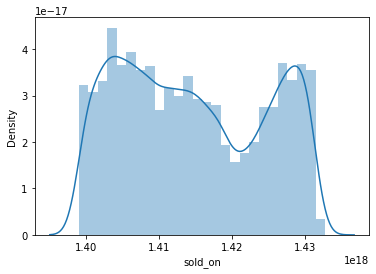

In [29]:
sns.distplot(df["sold_on"])

<AxesSubplot:xlabel='price', ylabel='Density'>

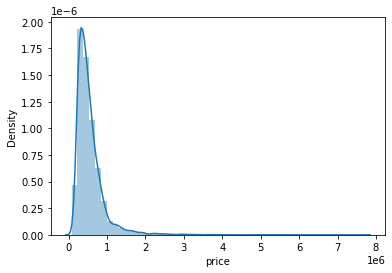

In [13]:
sns.distplot(df["price"])

In [17]:
df.rename({'dayhours':'sold_on', 'ceil' : 'floors','room_bed': 'total_beds', 'room_bath':'total_baths'},axis = 1, inplace = True)
df.head()

,sold_on,price,total_beds,total_baths,living_measure,lot_measure,floors,coast,sight,condition,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,2015-04-27,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,3,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,2015-03-17,190000,2.0,1.00,670.0,3101.0,1,0,0.0,4,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,2014-08-20,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,3,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,2014-10-10,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,3,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,2015-02-18,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,3,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


<AxesSubplot:xlabel='sold_on', ylabel='price'>

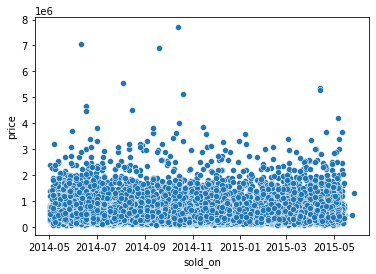

In [18]:
sns.scatterplot(df["sold_on"],df["price"])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sold_on           21613 non-null  datetime64[ns]
 1   price             21613 non-null  int64         
 2   total_beds        21505 non-null  float64       
 3   total_baths       21505 non-null  float64       
 4   living_measure    21596 non-null  float64       
 5   lot_measure       21571 non-null  float64       
 6   floors            21571 non-null  object        
 7   coast             21612 non-null  object        
 8   sight             21556 non-null  float64       
 9   condition         21556 non-null  object        
 10  quality           21612 non-null  float64       
 11  ceil_measure      21612 non-null  float64       
 12  basement          21612 non-null  float64       
 13  yr_built          21612 non-null  object        
 14  yr_renovated      2161

In [ ]:
#total_area should be a number
#there are anomalies in the feature that needs to be treated. 
#Since Total_area is the sum of lot and living measure, we can impute those values.

df["total_area"].value_counts()
df[df["total_area"] == "$"]

df["total_area"] = df["lot_measure"] + df["living_measure"]
df["total_area"]

df["total_area"].isnull().sum()

#Replacing missing values with median of total area since the number of missing values is less
df["total_area"].replace(np.nan,df['total_area'].median(),inplace = True)

In [ ]:
#converting data types of features

In [51]:
df["yr_renovated"] = df["yr_renovated"].astype("object") 
df["quality"] = df["quality"].astype("object") 
df["zipcode"] = df["zipcode"].astype("object")
df["furnished"] = df["furnished"].astype("object")
df["lat"] = df["lat"].astype("object")
df["sight"] = df["sight"].astype("object")
df["total_area"] = df["total_area"].astype("float64")


In [52]:
#separating the numeric data from the categorical data

In [53]:
df_num = df.select_dtypes(include = ["int64","float64"])
df_num.head()

,price,total_beds,total_baths,living_measure,lot_measure,ceil_measure,basement,living_measure15,lot_measure15,total_area
0,600000,4.0,1.75,3050.0,9440.0,1800.0,1250.0,2020.0,8660.0,12490.0
1,190000,2.0,1.00,670.0,3101.0,670.0,0.0,1660.0,4100.0,3771.0
2,735000,4.0,2.75,3040.0,2415.0,3040.0,0.0,2620.0,2433.0,5455.0
3,257000,3.0,2.50,1740.0,3721.0,1740.0,0.0,2030.0,3794.0,5461.0
4,450000,2.0,1.00,1120.0,4590.0,1120.0,0.0,1120.0,5100.0,5710.0


In [54]:
df_cat = df.select_dtypes(include = ["object",'datetime'])
df_cat.head()

,sold_on,floors,coast,sight,condition,quality,yr_built,yr_renovated,zipcode,lat,long,furnished
0,2015-04-27,1,0,0,3,8,1966,0,98034,47.7228,-122.183,0
1,2015-03-17,1,0,0,4,6,1948,0,98118,47.5546,-122.274,0
2,2014-08-20,2,1,4,3,8,1966,0,98118,47.5188,-122.256,0
3,2014-10-10,2,0,0,3,8,2009,0,98002,47.3363,-122.213,0
4,2015-02-18,1,0,0,3,7,1924,0,98118,47.5663,-122.285,0


In [106]:
df['total_beds'].median()

3.0

In [58]:
#We can observe that the data has a total of 689 missing values out of 21613 ie 3% of the given dataset.

# Analysis of Numeric Data

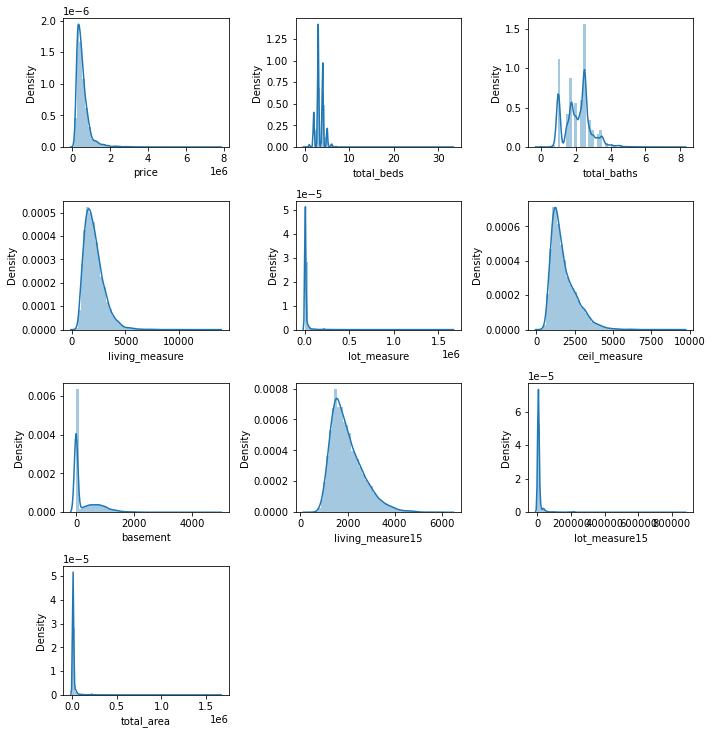

In [103]:
import warnings 
warnings.filterwarnings( "ignore")
fig = plt.figure(figsize = (10, 20))
for i in range(0, len(df_num.columns)):
    ax = fig.add_subplot(8,3, i+1)
    sns.distplot(df_num[df_num.columns[i]])
    plt.tight_layout()

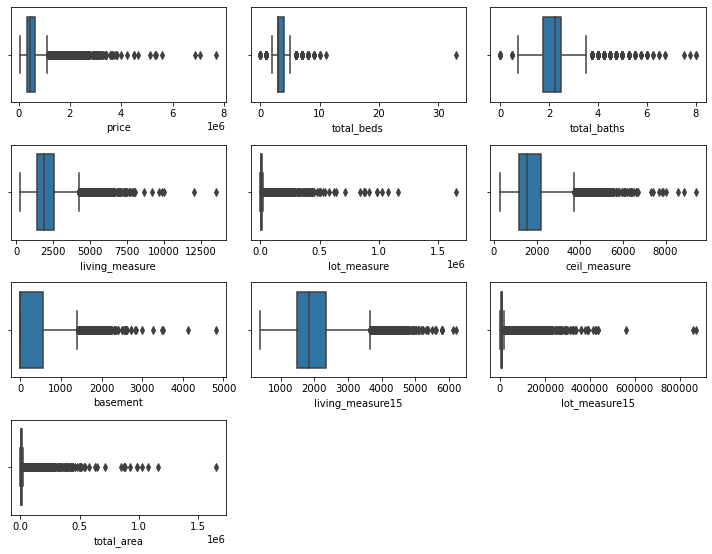

In [104]:
fig = plt.figure(figsize = (10, 15))
for i in range(0, len(df_num.columns)):
    ax = fig.add_subplot(8,3, i+1)
    sns.boxplot(df_num[df_num.columns[i]])
    plt.tight_layout()

In [35]:
df_num.describe()

,price,total_beds,total_baths,living_measure,lot_measure,ceil_measure,basement,living_measure15,lot_measure15,total_area
count,2.161300e+04,21505.000000,21505.000000,21596.000000,2.157100e+04,21612.000000,21612.000000,21447.000000,21584.000000,2.161300e+04
mean,5.401822e+05,3.371355,2.115171,2079.860761,1.510458e+04,1788.366556,291.522534,1987.065557,12766.543180,1.716477e+04
std,3.673622e+05,0.930289,0.770248,918.496121,4.142362e+04,828.102535,442.580840,685.519629,27286.987107,4.155062e+04
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,290.000000,0.000000,399.000000,651.000000,1.423000e+03
25%,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1190.000000,0.000000,1490.000000,5100.000000,7.041000e+03
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1560.000000,0.000000,1840.000000,7620.000000,9.578000e+03
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068450e+04,2210.000000,560.000000,2360.000000,10087.000000,1.296000e+04
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,9410.000000,4820.000000,6210.000000,871200.000000,1.652659e+06


# Treating Missing Values in Numeric Data

In [36]:
#Imputing null/missing values
#Since the number of records that are null in most columns are less, we can impute them with the respective median vlaues.

In [136]:
df_isnull = [i for i in df.columns if df[i].isnull().sum()>1]
for i in df_isnull: 
    print("Number of missing values in ", i ,"is:", df[i].isnull().sum())
    
print("Total Missing Values in the dataset      : ",df.isnull().sum().sum())
print("Total Missing Values in Numeric data     : ",df_num.isnull().sum().sum())
print("Total Missing Values in categorical data : ",df_cat.isnull().sum().sum())

Number of missing values in  total_beds is: 108
Number of missing values in  total_baths is: 108
Number of missing values in  living_measure is: 17
Number of missing values in  lot_measure is: 42
Number of missing values in  floors is: 42
Number of missing values in  sight is: 57
Number of missing values in  condition is: 57
Number of missing values in  living_measure15 is: 166
Number of missing values in  lot_measure15 is: 29
Number of missing values in  furnished is: 29
Total Missing Values in the dataset      :  660
Total Missing Values in numeric data     :  472
Total Missing Values in categorical data :  49


In [137]:
for i in df_num.columns:
    df_num[i] = df_num[i].replace(np.nan,df_num[i].median())

In [138]:
df_num.isnull().sum()

price               0
total_beds          0
total_baths         0
living_measure      0
lot_measure         0
ceil_measure        0
basement            0
living_measure15    0
lot_measure15       0
total_area          0
dtype: int64

In [67]:
round(df.describe().T,1)

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540182.2,367362.2,75000.0,321950.0,450000.0,645000.0,7700000.0
total_beds,21505.0,3.4,0.9,0.0,3.0,3.0,4.0,33.0
total_baths,21505.0,2.1,0.8,0.0,1.8,2.2,2.5,8.0
living_measure,21596.0,2079.9,918.5,290.0,1429.2,1910.0,2550.0,13540.0
lot_measure,21571.0,15104.6,41423.6,520.0,5040.0,7618.0,10684.5,1651359.0
ceil_measure,21612.0,1788.4,828.1,290.0,1190.0,1560.0,2210.0,9410.0
basement,21612.0,291.5,442.6,0.0,0.0,0.0,560.0,4820.0
living_measure15,21447.0,1987.1,685.5,399.0,1490.0,1840.0,2360.0,6210.0
lot_measure15,21584.0,12766.5,27287.0,651.0,5100.0,7620.0,10087.0,871200.0
total_area,21613.0,17164.8,41550.6,1423.0,7041.0,9578.0,12960.0,1652659.0


In [83]:
df_out = df_num.drop(["price"], axis = 1)

In [89]:
df_out.columns

Index(['total_beds', 'total_baths', 'living_measure', 'lot_measure',
       'ceil_measure', 'basement', 'living_measure15', 'lot_measure15',
       'total_area'],
      dtype='object')

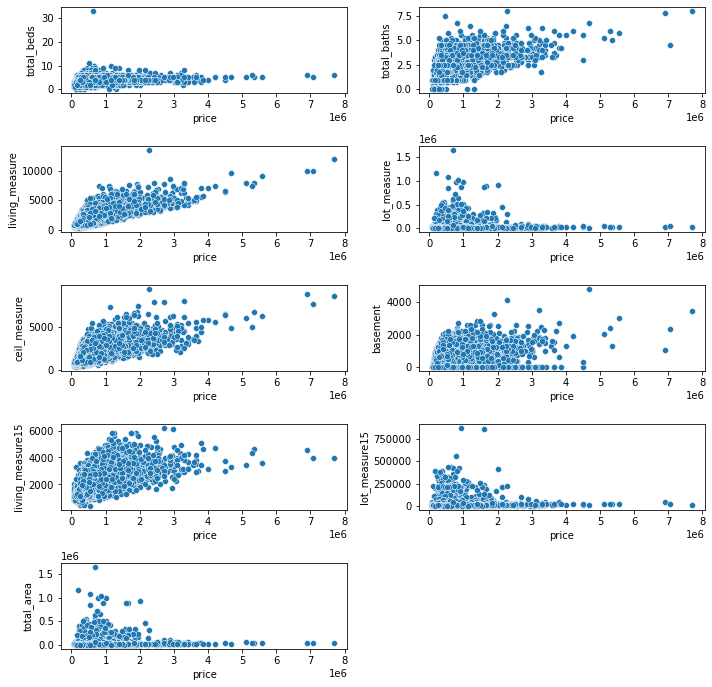

In [94]:
fig = plt.figure(figsize = (10, 15))
for i in range(0, len(df_out.columns)):
        ax = fig.add_subplot(8,2, i+1)
        sns.scatterplot(df_num["price"],df_out[df_out.columns[i]])
        plt.tight_layout()

<AxesSubplot:>

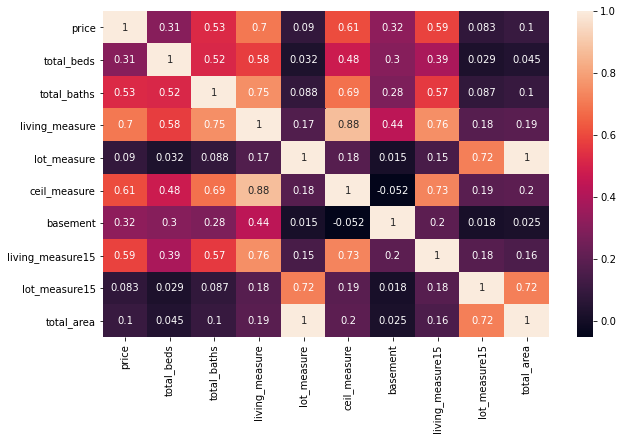

In [107]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(),annot = True)


# Feature Engineering

In [108]:
df_cat.isnull().sum()

sold_on          0
floors          42
coast            1
sight           57
condition       57
quality          1
yr_built         1
yr_renovated     0
zipcode          0
lat              0
long             0
furnished       29
dtype: int64

In [109]:
df_cat.head()

,sold_on,floors,coast,sight,condition,quality,yr_built,yr_renovated,zipcode,lat,long,furnished
0,2015-04-27,1,0,0,3,8,1966,0,98034,47.7228,-122.183,0
1,2015-03-17,1,0,0,4,6,1948,0,98118,47.5546,-122.274,0
2,2014-08-20,2,1,4,3,8,1966,0,98118,47.5188,-122.256,0
3,2014-10-10,2,0,0,3,8,2009,0,98002,47.3363,-122.213,0
4,2015-02-18,1,0,0,3,7,1924,0,98118,47.5663,-122.285,0


In [110]:
df_cat["floors"].value_counts()

1      10647
2       8210
1.5     1905
3        610
2.5      161
$         30
3.5        8
Name: floors, dtype: int64

In [111]:
df_cat["floors"] = df_cat["floors"].replace("$",1)
df_cat["floors"] = df_cat["floors"].replace(np.nan,df_cat["floors"].median())

In [112]:
df_cat["coast"].value_counts()

0    21421
1      161
$       30
Name: coast, dtype: int64

In [113]:
df_cat["sight"].value_counts()

0.0    19437
2.0      959
3.0      510
1.0      332
4.0      318
Name: sight, dtype: int64

In [114]:
df_cat["sight"] = df_cat["sight"].replace(np.nan,0)

In [115]:
df_cat["coast"] = df_cat["coast"].replace("$",0)
df_cat["coast"] = df_cat["coast"].replace(np.nan,0)

In [116]:
df_cat["condition"].value_counts()

3    13978
4     5655
5     1694
2      171
1       30
$       28
Name: condition, dtype: int64

In [117]:
df_cat["condition"] = df_cat["condition"].replace("$",3)
df_cat["condition"] = df_cat["condition"].replace(np.nan,df_cat["condition"].median())

In [118]:
df_cat["yr_built"].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    421
       ... 
1901     29
1902     27
1935     24
1934     21
$        14
Name: yr_built, Length: 117, dtype: int64

In [119]:
df_cat[df_cat['yr_built'] == '$']

,sold_on,floors,coast,sight,condition,quality,yr_built,yr_renovated,zipcode,lat,long,furnished
131,2015-04-02,3.0,0.0,0.0,3.0,9,$,0,98107,47.6692,-122.372,1
1841,2015-01-16,1.0,0.0,0.0,4.0,7,$,0,98166,47.4582,-122.365,0
1906,2014-10-21,1.0,0.0,0.0,3.0,7,$,0,98116,47.5719,-122.39,0
2407,2015-03-11,1.0,0.0,0.0,3.0,7,$,0,98118,47.5404,-122.268,0
2974,2014-06-01,1.0,0.0,0.0,3.0,6,$,0,98136,47.5243,-122.39,0
4529,2014-11-20,1.0,0.0,0.0,3.0,7,$,0,98034,47.7303,-122.227,0
5351,2014-11-18,2.0,0.0,0.0,3.0,8,$,0,98042,47.3405,-122.058,0
8205,2014-09-16,1.0,0.0,0.0,3.0,8,$,0,98053,47.7106,-122.03,0
13562,2014-07-24,1.0,0.0,2.0,5.0,8,$,0,98034,47.7022,-122.227,0
13581,2014-07-15,1.0,0.0,0.0,3.0,7,$,2009,98055,47.4905,-122.206,0


In [120]:
df_cat["yr_built"] = df_cat["yr_built"].replace("$",np.nan)

In [121]:
df_cat['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1954        1
1951        1
1948        1
1944        1
1934        1
Name: yr_renovated, Length: 70, dtype: int64

In [122]:
df_cat["quality"].value_counts()

7.0     8981
8.0     6067
9.0     2615
6.0     2038
10.0    1134
11.0     399
5.0      242
12.0      90
4.0       29
13.0      13
3.0        3
1.0        1
Name: quality, dtype: int64

In [123]:
df_cat["quality"] = df_cat["quality"].replace(np.nan,df_cat["quality"].median())

In [124]:
df_cat["furnished"].value_counts()

0.0    17338
1.0     4246
Name: furnished, dtype: int64

In [125]:
df_cat["furnished"] = df_cat["furnished"].replace(np.nan,0)

In [126]:
df_cat['lat'].value_counts()

47.5491    17
47.5322    17
47.6846    17
47.6624    17
47.6711    16
           ..
47.4795     1
47.3990     1
47.3312     1
47.2048     1
47.4700     1
Name: lat, Length: 5034, dtype: int64

In [127]:
df_cat['long'].unique()

array([-122.183, -122.274, -122.256, -122.213, -122.285, '$', -122.333,
       -122.165, -122.15, -122.178, -121.87, -122.352, -122.122, -122.275,
       -122.234, -122.324, -122.321, -122.277, -122.196, -122.398,
       -122.019, -122.181, -122.325, -122.191, -122.026, -122.084, -122.3,
       -122.287, -122.011, -122.127, -122.281, -122.221, -121.859,
       -121.913, -122.39, -121.871, -122.013, -122.381, -122.279,
       -122.194, -122.201, -122.125, -122.379, -122.121, -122.024,
       -122.389, -122.305, -122.346, -122.375, -122.344, -122.028,
       -122.193, -122.209, -122.365, -122.28, -122.334, -122.149,
       -122.388, -122.016, -122.298, -122.153, -121.802, -121.878,
       -122.218, -122.359, -122.296, -122.361, -122.357, -122.309,
       -122.056, -121.974, -122.18, -122.331, -122.374, -121.976,
       -121.975, -122.216, -122.188, -122.391, -122.31, -122.302,
       -121.972, -122.22, -122.17, -122.101, -121.888, -122.046, -122.154,
       -122.145, -122.236, -122.168, 

In [128]:
df_cat["long"] = df_cat["long"].replace("$", np.nan)

In [129]:
df["zipcode"].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [130]:
df_cat.isnull().sum()

sold_on          0
floors           0
coast            0
sight            0
condition        0
quality          0
yr_built        15
yr_renovated     0
zipcode          0
lat              0
long            34
furnished        0
dtype: int64

In [131]:
df_cat["yr_built"].describe(include = all)

count    21598.000000
mean      1971.009353
std         29.373436
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [132]:
df_cat["long"].value_counts()

-122.290    116
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.815      1
-121.711      1
-122.454      1
-121.835      1
-121.849      1
Name: long, Length: 752, dtype: int64

In [139]:
df_num.isnull().sum()

price               0
total_beds          0
total_baths         0
living_measure      0
lot_measure         0
ceil_measure        0
basement            0
living_measure15    0
lot_measure15       0
total_area          0
dtype: int64

In [140]:
df_num.shape

(21613, 10)

In [141]:
df_cat.shape

(21613, 12)

In [142]:
hpp = pd.concat([df_cat,df_num],axis = 1)
hpp

,sold_on,floors,coast,sight,condition,quality,yr_built,yr_renovated,zipcode,lat,...,price,total_beds,total_baths,living_measure,lot_measure,ceil_measure,basement,living_measure15,lot_measure15,total_area
0,2015-04-27,1.0,0.0,0.0,3.0,8.0,1966.0,0,98034,47.7228,...,600000,4.0,1.75,3050.0,9440.0,1800.0,1250.0,2020.0,8660.0,12490.0
1,2015-03-17,1.0,0.0,0.0,4.0,6.0,1948.0,0,98118,47.5546,...,190000,2.0,1.00,670.0,3101.0,670.0,0.0,1660.0,4100.0,3771.0
2,2014-08-20,2.0,1.0,4.0,3.0,8.0,1966.0,0,98118,47.5188,...,735000,4.0,2.75,3040.0,2415.0,3040.0,0.0,2620.0,2433.0,5455.0
3,2014-10-10,2.0,0.0,0.0,3.0,8.0,2009.0,0,98002,47.3363,...,257000,3.0,2.50,1740.0,3721.0,1740.0,0.0,2030.0,3794.0,5461.0
4,2015-02-18,1.0,0.0,0.0,3.0,7.0,1924.0,0,98118,47.5663,...,450000,2.0,1.00,1120.0,4590.0,1120.0,0.0,1120.0,5100.0,5710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2015-03-10,2.0,0.0,0.0,3.0,9.0,1996.0,0,98014,47.6618,...,685530,4.0,2.50,3130.0,60467.0,3130.0,0.0,2780.0,44224.0,63597.0
21609,2014-05-21,1.0,0.0,0.0,3.0,7.0,1939.0,0,98103,47.686,...,535000,2.0,1.00,1030.0,4841.0,920.0,110.0,1530.0,4944.0,5871.0
21610,2014-09-05,2.0,0.0,0.0,3.0,10.0,1978.0,0,98075,47.5888,...,998000,3.0,3.75,3710.0,34412.0,2910.0,800.0,2390.0,34412.0,38122.0
21611,2015-02-06,2.0,0.0,0.0,3.0,7.0,1997.0,0,98168,47.514,...,262000,4.0,2.50,1560.0,7800.0,1560.0,0.0,1160.0,7800.0,9360.0


In [143]:
hpp.isnull().sum()

sold_on              0
floors               0
coast                0
sight                0
condition            0
quality              0
yr_built            15
yr_renovated         0
zipcode              0
lat                  0
long                34
furnished            0
price                0
total_beds           0
total_baths          0
living_measure       0
lot_measure          0
ceil_measure         0
basement             0
living_measure15     0
lot_measure15        0
total_area           0
dtype: int64

In [148]:
hpp.dropna(inplace = True)

In [145]:
hpp["year_sold"] = pd.DatetimeIndex(hpp["sold_on"]).year
hpp["age_of_house"] = hpp["year_sold"] - hpp["yr_built"]

In [153]:
hpp['yr_built'] = hpp['yr_built'].astype('object')

In [146]:
hpp.head()

,sold_on,floors,coast,sight,condition,quality,yr_built,yr_renovated,zipcode,lat,...,total_baths,living_measure,lot_measure,ceil_measure,basement,living_measure15,lot_measure15,total_area,year_sold,age_of_house
0,2015-04-27,1.0,0.0,0.0,3.0,8.0,1966.0,0,98034,47.7228,...,1.75,3050.0,9440.0,1800.0,1250.0,2020.0,8660.0,12490.0,2015,49.0
1,2015-03-17,1.0,0.0,0.0,4.0,6.0,1948.0,0,98118,47.5546,...,1.00,670.0,3101.0,670.0,0.0,1660.0,4100.0,3771.0,2015,67.0
2,2014-08-20,2.0,1.0,4.0,3.0,8.0,1966.0,0,98118,47.5188,...,2.75,3040.0,2415.0,3040.0,0.0,2620.0,2433.0,5455.0,2014,48.0
3,2014-10-10,2.0,0.0,0.0,3.0,8.0,2009.0,0,98002,47.3363,...,2.50,1740.0,3721.0,1740.0,0.0,2030.0,3794.0,5461.0,2014,5.0
4,2015-02-18,1.0,0.0,0.0,3.0,7.0,1924.0,0,98118,47.5663,...,1.00,1120.0,4590.0,1120.0,0.0,1120.0,5100.0,5710.0,2015,91.0


In [149]:
import folium
import folium.plugins as plugins
lat = hpp['lat'].tolist()
lon = hpp['long'].tolist()
locations = list(zip(lat, lon))


map1 = folium.Map(location=[47.2931, -112.514], zoom_start=12)
plugins.FastMarkerCluster(locations).add_to(map1)
map1

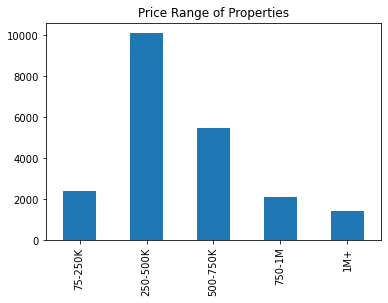

<Figure size 720x1800 with 0 Axes>

In [150]:
price_range = pd.cut(hpp["price"], bins = [75000,250000,500000,750000,1000000,hpp["price"].max()], labels = ["75-250K","250-500K","500-750K","750-1M","1M+"])
hpp["price_range"] = price_range
hpp["price_range"].value_counts().sort_index().plot(kind = 'bar')
plt.title("Price Range of Properties")
plt.figure(figsize = (10, 25))
plt.show();

In [151]:
hpp.to_excel(r'C:\Users\Vinay\Documents\GL docs\Projects\Capstone\House_predict\HPP_Final.xlsx', index = False)


In [154]:
hpp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21564 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sold_on           21564 non-null  datetime64[ns]
 1   floors            21564 non-null  float64       
 2   coast             21564 non-null  float64       
 3   sight             21564 non-null  float64       
 4   condition         21564 non-null  float64       
 5   quality           21564 non-null  float64       
 6   yr_built          21564 non-null  object        
 7   yr_renovated      21564 non-null  object        
 8   zipcode           21564 non-null  object        
 9   lat               21564 non-null  object        
 10  long              21564 non-null  float64       
 11  furnished         21564 non-null  float64       
 12  price             21564 non-null  int64         
 13  total_beds        21564 non-null  float64       
 14  total_baths       2156

In [172]:
hpp['lat'] = hpp['lat'].astype('object')
hpp['lon'] = hpp['lon'].astype('object')
hpp['year_sold'] = hpp['year_sold'].astype('object')

In [159]:
hpp['floors'] = hpp['floors'].astype('object')
hpp['coast'] = hpp['coast'].astype('object')
hpp['sight'] = hpp['sight'].astype('object')
hpp['condition'] = hpp['condition'].astype('object')
hpp['quality'] = hpp['quality'].astype('object')
hpp['furnished'] = hpp['furnished'].astype('object')
hpp['year_sold'] = hpp['year_sold'].astype('object')

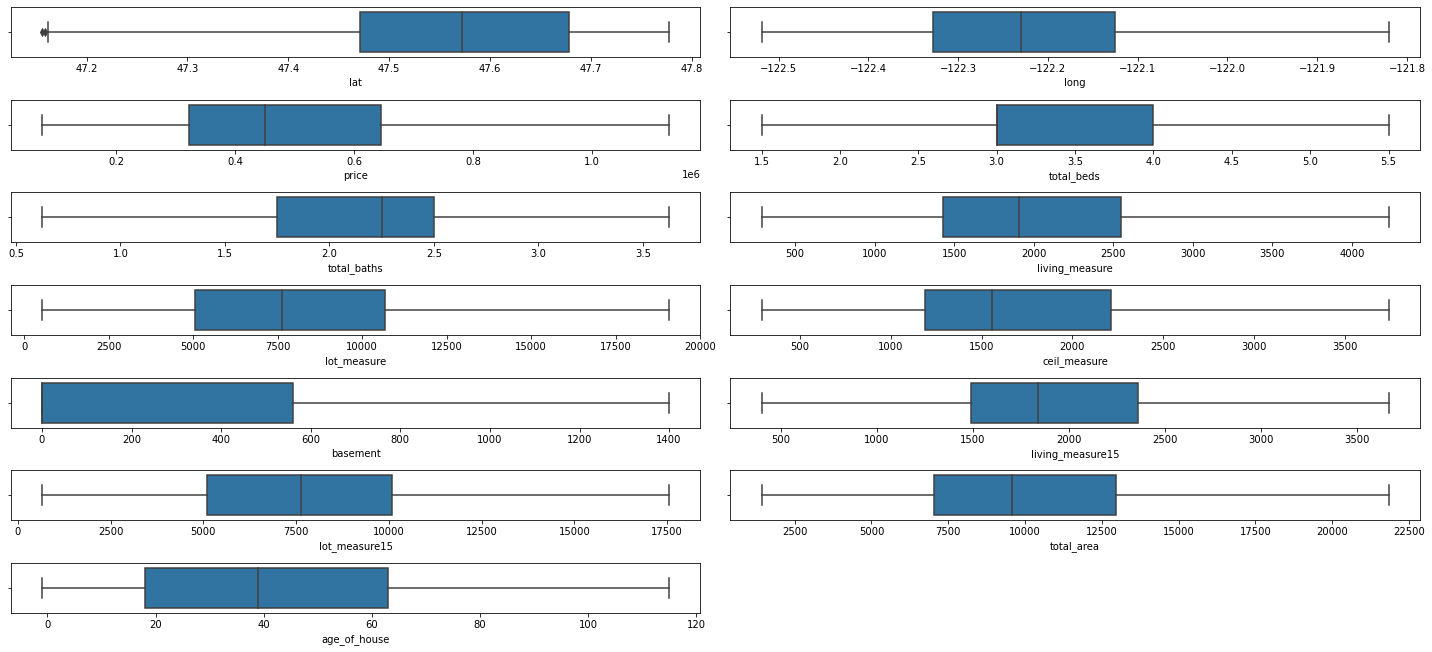

In [174]:
data_plot = hpp.select_dtypes(include = ["int64","float64"])
fig = plt.figure(figsize = (20, 10))
for i in range(0, len(data_plot.columns)):
    ax = fig.add_subplot(8,2, i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

In [175]:
data_plot.columns

Index(['lat', 'long', 'price', 'total_beds', 'total_baths', 'living_measure',
       'lot_measure', 'ceil_measure', 'basement', 'living_measure15',
       'lot_measure15', 'total_area', 'age_of_house'],
      dtype='object')

In [176]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range



for column in data_plot.columns:
    
    lr,ur=remove_outlier(hpp[column])
    hpp[column]=np.where(hpp[column]>ur,ur,hpp[column])
    hpp[column]=np.where(hpp[column]<lr,lr,hpp[column])


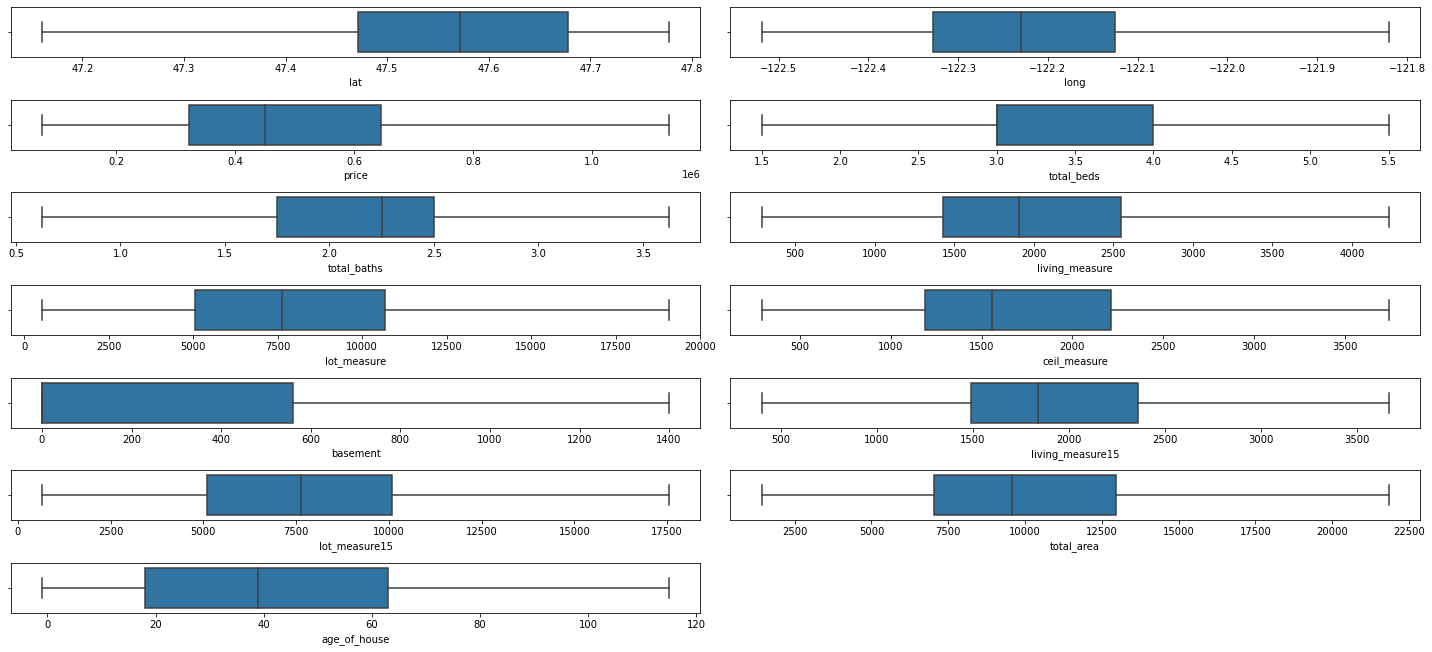

In [177]:
data_plot = hpp.select_dtypes(include = ["int64","float64"])
fig = plt.figure(figsize = (20, 10))
for i in range(0, len(data_plot.columns)):
    ax = fig.add_subplot(8,2, i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

# Other Analysis and Insights

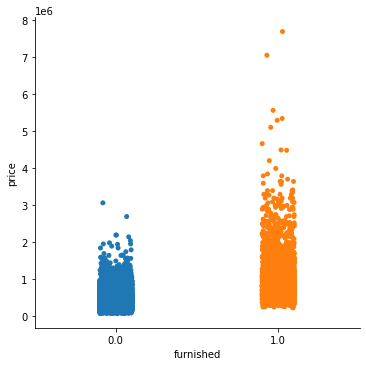

In [83]:
sns.catplot(x = 'furnished', y = 'price', data = hpp, ci = None)

<AxesSubplot:xlabel='condition', ylabel='price'>

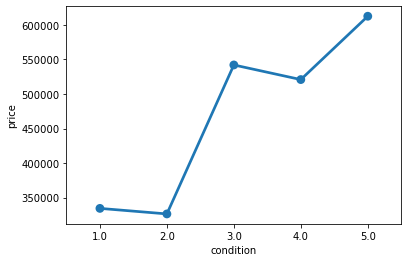

In [84]:
sns.pointplot(x = 'condition', y = 'price', data = hpp, ci = None)

<AxesSubplot:xlabel='floors', ylabel='price'>

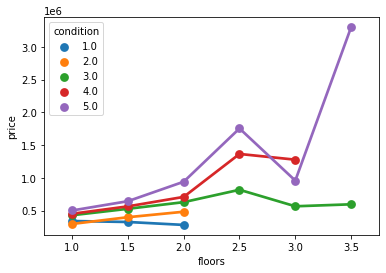

In [85]:
sns.pointplot(x = 'floors', y = 'price',hue = 'condition', data = hpp, ci = None)

In [87]:
df_copy = hpp.copy()

In [88]:
df_copy["year_sold"] = pd.DatetimeIndex(df_copy["sold_on"]).year
df_copy['year_sold'].value_counts()

2014    14598
2015     6966
Name: year_sold, dtype: int64

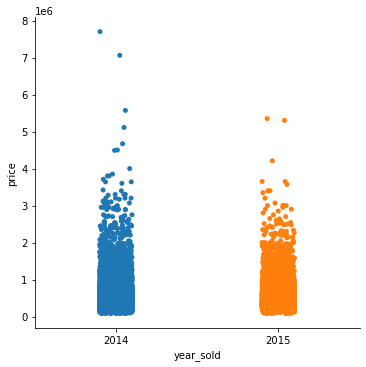

In [89]:
sns.catplot(x = "year_sold", y = "price", data = df_copy)

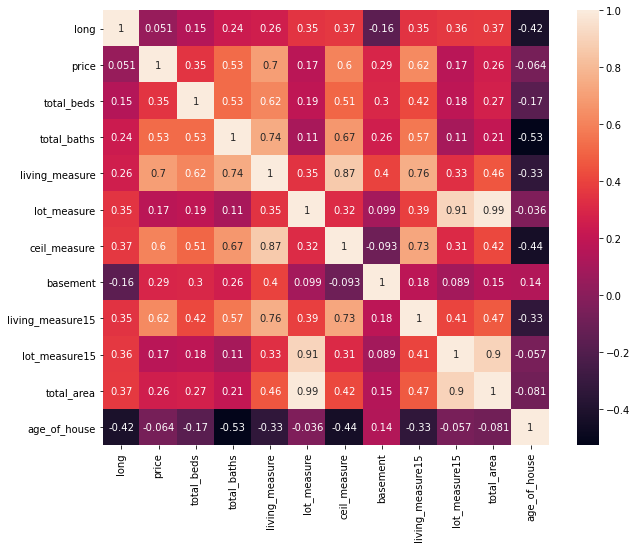

In [171]:
plt.figure(figsize=(10,8))
sns.heatmap(hpp.corr(), annot = True)
plt.show()

In [167]:
hpp.head()

,sold_on,floors,coast,sight,condition,quality,yr_built,yr_renovated,zipcode,lat,...,living_measure,lot_measure,ceil_measure,basement,living_measure15,lot_measure15,total_area,year_sold,age_of_house,price_range
0,2015-04-27,1,0,0,3,8,1966,0,98034,47.7228,...,3050.0,9440.0,1800.0,1250.0,2020.0,8660.0,12490.0,2015,49.0,500-750K
1,2015-03-17,1,0,0,4,6,1948,0,98118,47.5546,...,670.0,3101.0,670.0,0.0,1660.0,4100.0,3771.0,2015,67.0,75-250K
2,2014-08-20,2,1,4,3,8,1966,0,98118,47.5188,...,3040.0,2415.0,3040.0,0.0,2620.0,2433.0,5455.0,2014,48.0,500-750K
3,2014-10-10,2,0,0,3,8,2009,0,98002,47.3363,...,1740.0,3721.0,1740.0,0.0,2030.0,3794.0,5461.0,2014,5.0,250-500K
4,2015-02-18,1,0,0,3,7,1924,0,98118,47.5663,...,1120.0,4590.0,1120.0,0.0,1120.0,5100.0,5710.0,2015,91.0,250-500K


In [178]:
hpp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21564 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sold_on           21564 non-null  datetime64[ns]
 1   floors            21564 non-null  object        
 2   coast             21564 non-null  object        
 3   sight             21564 non-null  object        
 4   condition         21564 non-null  object        
 5   quality           21564 non-null  object        
 6   yr_built          21564 non-null  object        
 7   yr_renovated      21564 non-null  object        
 8   zipcode           21564 non-null  object        
 9   lat               21564 non-null  float64       
 10  long              21564 non-null  float64       
 11  furnished         21564 non-null  object        
 12  price             21564 non-null  float64       
 13  total_beds        21564 non-null  float64       
 14  total_baths       2156

In [187]:
hpp.dropna(inplace = True)

In [179]:
#dataset without droping columns

df_clean = hpp.copy()

In [239]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21564 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sold_on           21564 non-null  datetime64[ns]
 1   floors            21564 non-null  int8          
 2   coast             21564 non-null  object        
 3   sight             21564 non-null  int8          
 4   condition         21564 non-null  int8          
 5   quality           21564 non-null  int8          
 6   yr_built          21564 non-null  object        
 7   yr_renovated      21564 non-null  int8          
 8   zipcode           21564 non-null  int8          
 9   lat               21564 non-null  float64       
 10  long              21564 non-null  float64       
 11  furnished         21564 non-null  int8          
 12  price             21564 non-null  float64       
 13  total_beds        21564 non-null  float64       
 14  total_baths       2156

In [236]:
for column in hpp_copy.columns:
    if df_clean[column].dtype == 'object':
        df_clean[column] = pd.Categorical(df_clean[column]).codes 

In [237]:
df_clean.head()

,sold_on,floors,coast,sight,condition,quality,yr_built,yr_renovated,zipcode,lat,...,living_measure,lot_measure,ceil_measure,basement,living_measure15,lot_measure15,total_area,year_sold,age_of_house,price_range
0,2015-04-27,0,0,0,2,6,1966,0,22,47.7228,...,3050.0,9440.0,1800.0,1250.0,2020.0,8660.0,12490.0,1,49.0,500-750K
1,2015-03-17,0,0,0,3,4,1948,0,52,47.5546,...,670.0,3101.0,670.0,0.0,1660.0,4100.0,3771.0,1,67.0,75-250K
2,2014-08-20,2,1,4,2,6,1966,0,52,47.5188,...,3040.0,2415.0,3040.0,0.0,2620.0,2433.0,5455.0,0,48.0,500-750K
3,2014-10-10,2,0,0,2,6,2009,0,1,47.3363,...,1740.0,3721.0,1740.0,0.0,2030.0,3794.0,5461.0,0,5.0,250-500K
4,2015-02-18,0,0,0,2,5,1924,0,52,47.5663,...,1120.0,4590.0,1120.0,0.0,1120.0,5100.0,5710.0,1,91.0,250-500K


In [225]:
#Dataset After droping columns

In [188]:
hpp_copy = hpp.copy()

In [189]:
for column in hpp_copy.columns:
    if hpp_copy[column].dtype == 'object':
        hpp_copy[column] = pd.Categorical(hpp_copy[column]).codes 

In [190]:
hpp_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21563 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sold_on           21563 non-null  datetime64[ns]
 1   floors            21563 non-null  int8          
 2   coast             21563 non-null  int8          
 3   sight             21563 non-null  int8          
 4   condition         21563 non-null  int8          
 5   quality           21563 non-null  int8          
 6   yr_built          21563 non-null  int8          
 7   yr_renovated      21563 non-null  int8          
 8   zipcode           21563 non-null  int8          
 9   lat               21563 non-null  float64       
 10  long              21563 non-null  float64       
 11  furnished         21563 non-null  int8          
 12  price             21563 non-null  float64       
 13  total_beds        21563 non-null  float64       
 14  total_baths       2156

In [191]:
hpp_copy.head()

,sold_on,floors,coast,sight,condition,quality,yr_built,yr_renovated,zipcode,lat,...,living_measure,lot_measure,ceil_measure,basement,living_measure15,lot_measure15,total_area,year_sold,age_of_house,price_range
0,2015-04-27,0,0,0,2,6,66,0,22,47.7228,...,3050.0,9440.0,1800.0,1250.0,2020.0,8660.0,12490.0,1,49.0,500-750K
1,2015-03-17,0,0,0,3,4,48,0,52,47.5546,...,670.0,3101.0,670.0,0.0,1660.0,4100.0,3771.0,1,67.0,75-250K
2,2014-08-20,2,1,4,2,6,66,0,52,47.5188,...,3040.0,2415.0,3040.0,0.0,2620.0,2433.0,5455.0,0,48.0,500-750K
3,2014-10-10,2,0,0,2,6,109,0,1,47.3363,...,1740.0,3721.0,1740.0,0.0,2030.0,3794.0,5461.0,0,5.0,250-500K
4,2015-02-18,0,0,0,2,5,24,0,52,47.5663,...,1120.0,4590.0,1120.0,0.0,1120.0,5100.0,5710.0,1,91.0,250-500K


In [192]:
hpp_copy.drop(['price_range','sold_on','coast','yr_built','living_measure','lot_measure'],axis = 1,inplace = True)


In [193]:
hpp_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21563 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   floors            21563 non-null  int8   
 1   sight             21563 non-null  int8   
 2   condition         21563 non-null  int8   
 3   quality           21563 non-null  int8   
 4   yr_renovated      21563 non-null  int8   
 5   zipcode           21563 non-null  int8   
 6   lat               21563 non-null  float64
 7   long              21563 non-null  float64
 8   furnished         21563 non-null  int8   
 9   price             21563 non-null  float64
 10  total_beds        21563 non-null  float64
 11  total_baths       21563 non-null  float64
 12  ceil_measure      21563 non-null  float64
 13  basement          21563 non-null  float64
 14  living_measure15  21563 non-null  float64
 15  lot_measure15     21563 non-null  float64
 16  total_area        21563 non-null  float6

# PCA

In [194]:
df_scaled = hpp_copy.apply(zscore)

In [195]:
df_scaled.head()

,floors,sight,condition,quality,yr_renovated,zipcode,lat,long,furnished,price,total_beds,total_baths,ceil_measure,basement,living_measure15,lot_measure15,total_area,year_sold,age_of_house
0,-0.915603,-0.305236,-0.627334,0.291634,-0.200549,-0.682832,1.174455,0.231929,-0.494661,0.353338,0.749251,-0.485048,0.039279,2.316541,0.069701,0.083168,0.320389,1.447725,0.193745
1,-0.915603,-0.305236,0.911596,-1.410952,-0.200549,0.875924,-0.039325,-0.431171,-0.494661,-1.286611,-1.597313,-1.526358,-1.439411,-0.680874,-0.486891,-0.962834,-1.298822,1.447725,0.806329
2,0.938475,4.922561,-0.627334,0.291634,-0.200549,0.875924,-0.297668,-0.300009,-0.494661,0.893321,0.749251,0.903366,1.661913,-0.680874,0.997354,-1.345221,-0.986085,-0.690739,0.159713
3,0.938475,-0.305236,-0.627334,0.291634,-0.200549,-1.773962,-1.614640,0.013324,-0.494661,-1.018619,-0.424031,0.556262,-0.039235,-0.680874,0.085162,-1.033026,-0.984971,-0.690739,-1.303683
4,-0.915603,-0.305236,-0.627334,-0.559659,-0.200549,0.875924,0.045106,-0.511326,-0.494661,-0.246643,-1.597313,-1.526358,-0.850552,-0.680874,-1.321779,-0.733448,-0.938729,1.447725,1.623108


In [197]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

0.7996509332119379

In [198]:
cov_matrix = df_scaled.cov()
cov_matrix

,floors,sight,condition,quality,yr_renovated,zipcode,lat,long,furnished,price,total_beds,total_baths,ceil_measure,basement,living_measure15,lot_measure15,total_area,year_sold,age_of_house
floors,1.000046,0.028889,-0.262315,0.457539,0.007870,-0.038419,0.049896,0.128057,0.347085,0.298273,0.183296,0.511130,0.541268,-0.255799,0.280259,-0.194277,-0.129517,-0.022073,-0.488226
sight,0.028889,1.000046,0.046184,0.249858,0.093259,0.071062,0.005650,-0.080005,0.219320,0.355165,0.081604,0.170830,0.155704,0.258783,0.275778,0.145701,0.173262,0.001599,0.052921
condition,-0.262315,0.046184,1.000046,-0.145259,-0.074968,-0.005974,-0.015158,-0.107069,-0.122480,0.040496,0.023719,-0.128917,-0.163470,0.178793,-0.092823,0.075091,0.053252,-0.044755,0.360086
quality,0.457539,0.249858,-0.145259,1.000046,0.028308,-0.175272,0.113646,0.206481,0.788515,0.706069,0.374852,0.657578,0.749789,0.145274,0.704963,0.236039,0.316952,-0.030306,-0.447580
yr_renovated,0.007870,0.093259,-0.074968,0.028308,1.000046,0.059809,0.029637,-0.067546,0.027613,0.131019,0.027159,0.061982,0.026064,0.079907,0.000705,0.018512,0.025978,-0.023340,0.202818
zipcode,-0.038419,0.071062,-0.005974,-0.175272,0.059809,1.000046,0.300406,-0.525366,-0.129773,-0.034407,-0.164192,-0.198906,-0.253161,0.069736,-0.269961,-0.303943,-0.302157,0.001515,0.327317
lat,0.049896,0.005650,-0.015158,0.113646,0.029637,0.300406,1.000046,-0.138558,0.080621,0.402342,-0.016494,0.020123,-0.006705,0.114370,0.047662,-0.119143,-0.109337,-0.029597,0.148005
long,0.128057,-0.080005,-0.107069,0.206481,-0.067546,-0.525366,-0.138558,1.000046,0.192660,0.050952,0.152729,0.240392,0.367095,-0.157199,0.349554,0.364657,0.371088,0.000096,-0.417738
furnished,0.347085,0.219320,-0.122480,0.788515,0.027613,-0.129773,0.080621,0.192660,1.000046,0.616657,0.276304,0.479751,0.658538,0.071573,0.618378,0.249193,0.309722,-0.025262,-0.305588
price,0.298273,0.355165,0.040496,0.706069,0.131019,-0.034407,0.402342,0.050952,0.616657,1.000046,0.350748,0.525433,0.602213,0.293897,0.624511,0.167546,0.256574,0.003369,-0.064011


In [199]:
eig_vals,eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 2.04115638e-01  4.11911779e-01 -1.85456484e-01  2.60523341e-02
   3.77581305e-02 -5.62101671e-02  5.72858198e-02 -2.07092831e-01
   1.14681316e-01 -2.88354069e-01  2.51728229e-01 -2.26037789e-01
  -2.08944777e-01  5.41378969e-01 -3.84218553e-01 -1.25874190e-02
  -3.08606309e-02  8.10993732e-02  4.15987715e-03]
 [ 1.16587129e-01 -2.54352615e-01 -1.66327560e-01  5.48122579e-02
   2.49180258e-01  1.28569640e-01  6.48474545e-01  2.72772328e-02
  -2.80912641e-01 -4.87868176e-01 -1.44810866e-01 -2.36064185e-03
   2.07615854e-01 -2.52758194e-02 -2.17079697e-03  2.64174912e-03
  -7.50004700e-02 -4.62482836e-02  4.16750248e-02]
 [-6.84353982e-02 -3.29667519e-01  1.51605044e-02 -2.99579395e-01
  -3.55921031e-01 -6.63251724e-02  5.40822383e-02 -6.66362459e-01
  -5.08311963e-02 -6.86506345e-02  3.82324579e-01  1.04943467e-01
   1.16239409e-01 -1.46700392e-01 -1.28131048e-01 -1.71132851e-02
  -1.63699235e-02 -4.58452578e-02 -4.57295231e-03]
 [ 3.65567804e-01  2.86239357e-02 -1.

In [200]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 29.92882842  41.93275764  53.78516489  59.93515192  65.46333843
  70.78963707  75.70935891  80.22860588  84.22936813  87.48814055
  90.25043037  92.47860202  94.26010036  95.86342402  97.13604098
  98.13765669  98.89210806  99.56718137 100.        ]


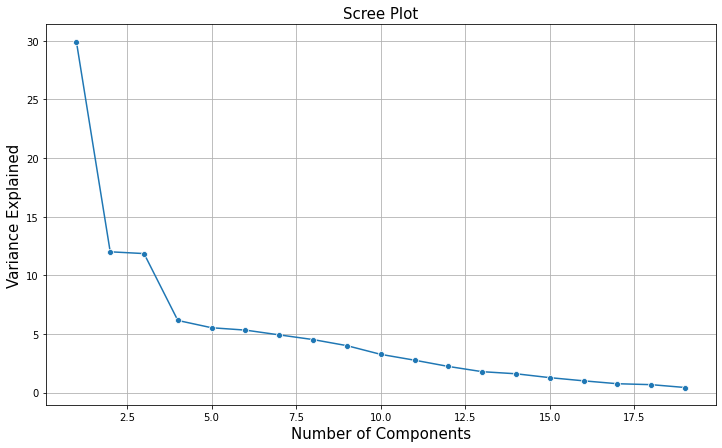

In [201]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [202]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 11)
red_df = pca.fit_transform(df_scaled)
red_df.transpose()

array([[ 0.25914248, -3.83125658,  1.74018876, ...,  4.72594039,
        -0.96729502,  1.34208422],
       [ 0.1616008 ,  0.12600482,  2.50917505, ..., -0.2025808 ,
         0.42455934,  2.7429983 ],
       [ 1.37724674, -0.15204117, -0.23333049, ...,  0.96327284,
        -1.53661325,  0.21216176],
       ...,
       [ 0.86617466,  0.37804728,  0.49300129, ..., -0.21932395,
        -1.81607553, -0.50940935],
       [-0.30980306, -0.37907357,  3.09422765, ..., -0.87023352,
         0.84710425, -0.78235329],
       [ 0.4855386 , -0.14116911,  1.71348044, ..., -1.49199958,
        -0.91158668,  0.79870383]])

In [208]:
df_comp = pd.DataFrame(pca.components_,columns=list(df_scaled))
df_comp

,floors,sight,condition,quality,yr_renovated,zipcode,lat,long,furnished,price,total_beds,total_baths,ceil_measure,basement,living_measure15,lot_measure15,total_area,year_sold,age_of_house
0,0.204116,0.116587,-0.068435,0.365568,0.013128,-0.146847,0.016290,0.182587,0.320869,0.297959,0.232138,0.326220,0.372748,0.062662,0.354261,0.182064,0.221437,-0.011937,-0.219875
1,0.185456,0.166328,-0.015161,0.147503,0.127475,0.411177,0.365111,-0.399043,0.116934,0.304368,0.035743,0.124482,0.006267,0.180930,-0.005776,-0.382704,-0.341609,-0.014280,0.137252
2,-0.411912,0.254353,0.329668,-0.028624,0.123225,0.064258,0.088596,-0.117987,0.005855,0.177079,0.095967,-0.102277,-0.095775,0.390383,0.091916,0.343174,0.341553,-0.012907,0.399217
3,0.026052,0.054812,-0.299579,0.066011,0.224309,0.193344,0.300918,0.037986,0.197033,0.109865,-0.469759,-0.315148,0.071850,-0.467238,0.045387,0.252271,0.203999,0.026710,0.141892
4,0.037758,0.249180,-0.355921,-0.056621,0.726359,-0.022044,-0.413520,-0.069954,-0.082993,-0.121626,0.082703,0.111758,-0.011311,0.099232,-0.053135,-0.016611,0.000042,0.219556,0.018237
5,0.056210,-0.128570,0.066325,-0.023152,0.335852,-0.050579,0.002413,0.036918,-0.030871,-0.035168,0.045166,0.037108,0.031990,-0.044742,-0.033705,-0.006174,-0.002041,-0.919994,0.049528
6,0.057286,0.648475,0.054082,0.091243,-0.333681,0.085024,-0.451630,-0.204327,0.136893,-0.087967,-0.300581,-0.068582,-0.030416,-0.054649,0.037619,-0.009381,-0.024859,-0.245861,-0.112460
7,0.207093,-0.027277,0.666362,0.029508,0.226464,-0.187593,-0.228098,-0.007837,0.102923,0.130050,-0.014381,-0.064533,0.183159,-0.400228,-0.012249,-0.125278,-0.129974,0.186710,0.282287
8,-0.114681,0.280913,0.050831,0.021034,0.149617,-0.505354,0.263846,0.399608,-0.024546,0.186619,-0.391611,-0.001307,-0.222365,0.207631,0.040933,-0.212653,-0.240133,0.007174,-0.109006
9,0.288354,0.487868,0.068651,-0.297109,-0.047960,0.141547,0.295408,0.267600,-0.494852,-0.022077,0.274256,0.089481,0.096916,-0.224651,-0.049705,0.077737,0.087579,-0.001944,0.000851


In [204]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   floors            11 non-null     float64
 1   sight             11 non-null     float64
 2   condition         11 non-null     float64
 3   quality           11 non-null     float64
 4   yr_renovated      11 non-null     float64
 5   zipcode           11 non-null     float64
 6   lat               11 non-null     float64
 7   long              11 non-null     float64
 8   furnished         11 non-null     float64
 9   price             11 non-null     float64
 10  total_beds        11 non-null     float64
 11  total_baths       11 non-null     float64
 12  ceil_measure      11 non-null     float64
 13  basement          11 non-null     float64
 14  living_measure15  11 non-null     float64
 15  lot_measure15     11 non-null     float64
 16  total_area        11 non-null     float64
 17 

<AxesSubplot:>

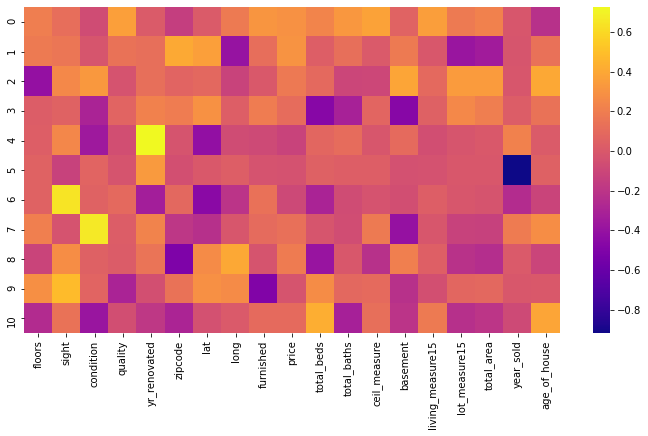

In [205]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [206]:
from matplotlib.patches import Rectangle

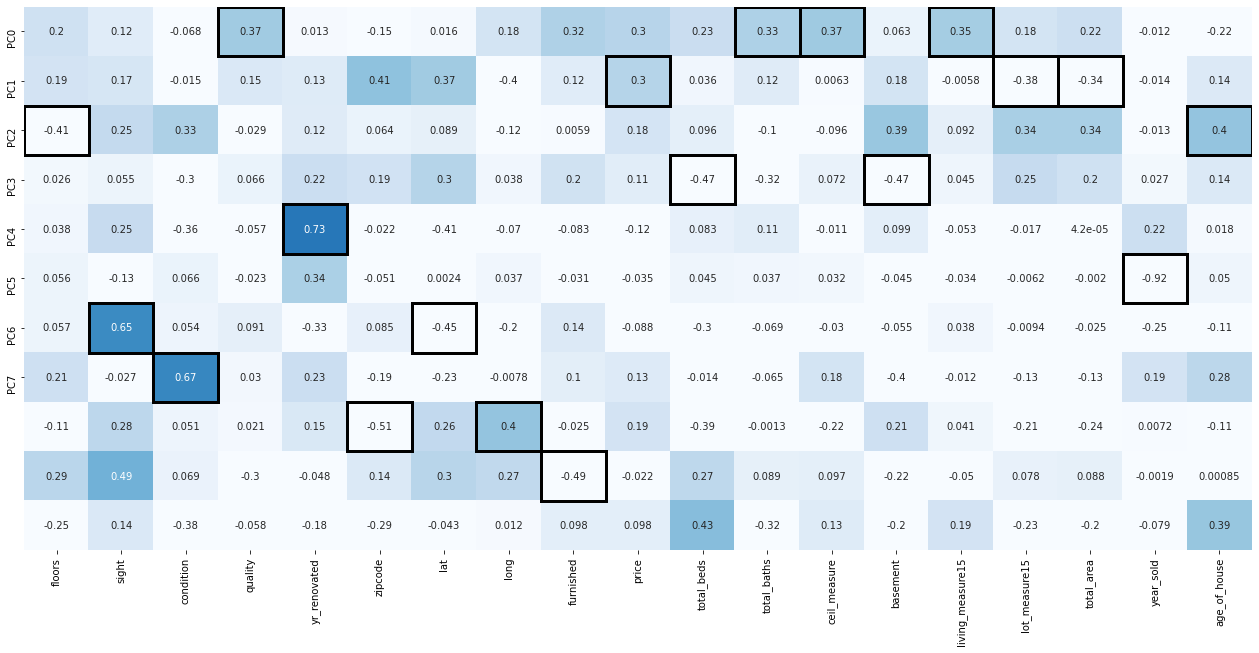

In [207]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_comp, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

column_max = df_comp.abs().idxmax(axis=0)

for col, variable in enumerate(df_comp.columns):
    position = df_comp.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='black', lw=3))

In [ ]:
#From PCA we can see that the all of the variance in the data is captured by only 11 features. Hence, we will focus on finding out the best features for our model.

# Linear Regression Model without scaling

In [240]:
X = df_clean.drop(["price","sold_on",'price_range'], axis = 1)
y = df_clean["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [241]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [242]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))
    intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The coefficient for floors is 9384.925878921023
The coefficient for coast is 124754.51810700881
The coefficient for sight is 35118.24244137494
The coefficient for condition is 27884.223864624902
The coefficient for quality is 63663.79039256628
The coefficient for yr_built is 6353.913566679803
The coefficient for yr_renovated is 936.32561761318
The coefficient for zipcode is -1051.5679399978458
The coefficient for lat is 571256.6767692929
The coefficient for long is -71697.91116290196
The coefficient for furnished is 66003.61146054917
The coefficient for total_beds is -13801.229115537464
The coefficient for total_baths is 23812.882457596024
The coefficient for living_measure is 138.43972887517938
The coefficient for lot_measure is -20.37988093115981
The coefficient for ceil_measure is -54.18475408322096
The coefficient for basement is -60.05252720940452
The coefficient for living_measure15 is 42.949467435607666
The coefficient for lot_measure15 is -2.9458080828482824
The coefficient for

0.7650784998377388
0.7597220965864435
121920.96028288301
120742.20196229217


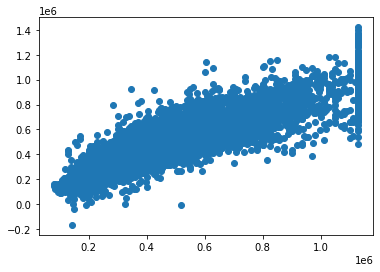

<Figure size 7200x7200 with 0 Axes>

In [243]:
scores_train = regression_model.score(X_train, y_train)
print("Model score on Training Set: "scores_train)
scores_test = regression_model.score(X_test, y_test)
print("Model score on Test Set: "scores_test)
ytrain_pred = regression_model.predict(X_train)
y_pred = regression_model.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train,ytrain_pred))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE of Train Data: " rmse_train)
print("RMSE of Test Data: "rmse_test)
plt.scatter(y_test, y_pred)
plt.figure(figsize = (100, 100))
plt.show()

# Linear Regression Model with Scaled : 

In [249]:
X = df_scaled.drop(["price"], axis = 1)
y = df_scaled["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [250]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [251]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))
    intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The coefficient for floors is 0.04002138546516044
The coefficient for sight is 0.12486232807828243
The coefficient for condition is 0.07618299347340358
The coefficient for quality is 0.3050035334542652
The coefficient for yr_renovated is 0.03743715169096307
The coefficient for zipcode is -0.07584945180895017
The coefficient for lat is 0.3173136869473043
The coefficient for long is -0.037536585129376035
The coefficient for furnished is 0.10444407821388615
The coefficient for total_beds is -0.04267284124249944
The coefficient for total_baths is 0.07959257245110936
The coefficient for ceil_measure is 0.287448826287995
The coefficient for basement is 0.13880929207709183
The coefficient for living_measure15 is 0.12047910477081222
The coefficient for lot_measure15 is -0.06125898082157951
The coefficient for total_area is 0.005180307739264169
The coefficient for year_sold is 0.03972306984055084
The coefficient for age_of_house is 0.22124407244839592
The intercept for our model is 0.0060450303

Model score on Training Set:  0.7594116096456297
Model score on Test Set:  0.7569689477941184
RMSE of Train Data:  0.49280210000052815
RMSE of Test Data:  0.4874236677346061


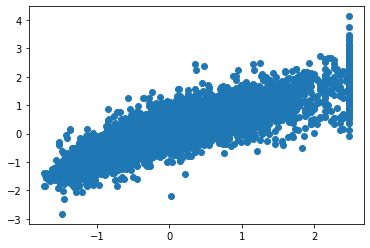

<Figure size 7200x7200 with 0 Axes>

In [253]:
scores_train = regression_model.score(X_train, y_train)
print("Model score on Training Set: ",scores_train)
scores_test = regression_model.score(X_test, y_test)
print("Model score on Test Set: ",scores_test)
ytrain_pred = regression_model.predict(X_train)
y_pred = regression_model.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train,ytrain_pred))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE of Train Data: ", rmse_train)
print("RMSE of Test Data: ",rmse_test)
plt.scatter(y_test, y_pred)
plt.figure(figsize = (100, 100))
plt.show()

# Linear Model with dropped Columns

In [260]:
X = hpp_copy.drop(["price"], axis = 1)
y = hpp_copy["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [261]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [264]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, round(regression_model.coef_[idx],2)))
    intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The coefficient for floors is 9275.64
The coefficient for sight is 40798.45
The coefficient for condition is 29310.99
The coefficient for quality is 64913.89
The coefficient for yr_renovated is 890.05
The coefficient for zipcode is -985.29
The coefficient for lat is 572474.55
The coefficient for long is -68382.63
The coefficient for furnished is 65703.85
The coefficient for total_beds is -12517.21
The coefficient for total_baths is 27627.72
The coefficient for ceil_measure is 94.04
The coefficient for basement is 83.22
The coefficient for living_measure15 is 46.57
The coefficient for lot_measure15 is -3.51
The coefficient for total_area is 0.24
The coefficient for year_sold is 21237.25
The coefficient for age_of_house is 1882.43
The intercept for our model is -35867583.87980431


Model score on Training Set:  0.7594116096456298
Model score on Test Set:  0.7569689477941187
RMSE of Train Data:  123204.38633460125
RMSE of Test Data:  121859.73612559348


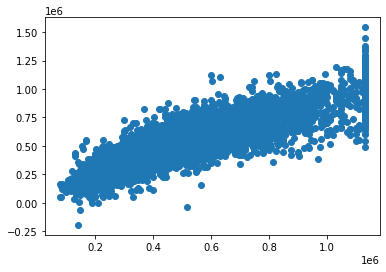

<Figure size 7200x7200 with 0 Axes>

In [263]:
scores_train = regression_model.score(X_train, y_train)
print("Model score on Training Set: ",scores_train)
scores_test = regression_model.score(X_test, y_test)
print("Model score on Test Set: ",scores_test)
ytrain_pred = regression_model.predict(X_train)
y_pred = regression_model.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train,ytrain_pred))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE of Train Data: ", rmse_train)
print("RMSE of Test Data: ",rmse_test)
plt.scatter(y_test, y_pred)
plt.figure(figsize = (100, 100))
plt.show()

# Using StatsModels

In [265]:
from sklearn.model_selection import train_test_split

Train, Test = train_test_split(hpp_copy, test_size=0.30 , random_state=1)
print(Train.shape)
print(Test.shape)

(15094, 19)
(6469, 19)


In [266]:
hpp_copy.columns

Index(['floors', 'sight', 'condition', 'quality', 'yr_renovated', 'zipcode',
       'lat', 'long', 'furnished', 'price', 'total_beds', 'total_baths',
       'ceil_measure', 'basement', 'living_measure15', 'lot_measure15',
       'total_area', 'year_sold', 'age_of_house'],
      dtype='object')

In [267]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ floors+sight+condition+quality+yr_renovated+zipcode+lat+long+furnished+total_beds+total_baths++ceil_measure+basement+living_measure15+lot_measure15+total_area+ year_sold+age_of_house',data = Train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     2644.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:37:35   Log-Likelihood:            -1.9834e+05
No. Observations:               15094   AIC:                         3.967e+05
Df Residuals:                   15075   BIC:                         3.969e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.587e+07   1.29e+06  

In [268]:

def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [269]:
vif_cal(input_data=Train.drop(['price'],axis=1))


floors  VIF =  2.32
sight  VIF =  1.23
condition  VIF =  1.27
quality  VIF =  4.64
yr_renovated  VIF =  1.15
zipcode  VIF =  1.6
lat  VIF =  1.22
long  VIF =  1.81
furnished  VIF =  2.83
total_beds  VIF =  1.8
total_baths  VIF =  3.35
ceil_measure  VIF =  5.71
basement  VIF =  2.12
living_measure15  VIF =  3.02
lot_measure15  VIF =  5.82
total_area  VIF =  6.41
year_sold  VIF =  1.01
age_of_house  VIF =  2.45


In [270]:
y_pred_1_Train = lm1.fittedvalues

y_pred_1_Test = lm1.predict(Test)


In [271]:
from sklearn.metrics import mean_squared_error

print('RMSE on Training Set for Model 1:',mean_squared_error(y_true=Train['price'],y_pred=y_pred_1_Train,squared=False))


RMSE on Training Set for Model 1: 123204.38633460118


In [272]:
print('RMSE on Test Set for Model 1:',mean_squared_error(y_true=Test['price'],y_pred=y_pred_1_Test,squared=False))

RMSE on Test Set for Model 1: 121859.7361255906


In [ ]:
#removing more features: total_baths,ceil_measure,basement

In [127]:
lm3 = smf.ols(formula= 'price ~ floors+sight+condition+quality+yr_built+yr_renovated+zipcode+lat+long+furnished+total_beds+total_baths+ceil_measure+basement+living_measure15+lot_measure15+ year_sold+age_of_house',data =Train).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     2785.
Date:                Fri, 25 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:56:32   Log-Likelihood:                -10786.
No. Observations:               15094   AIC:                         2.161e+04
Df Residuals:                   15076   BIC:                         2.175e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0050      0.004  

In [128]:
y_pred_3_Train = lm3.fittedvalues
y_pred_3_Test = lm3.predict(Test)

In [129]:
print('RMSE on Training Set for Model 3:',mean_squared_error(y_true=Train['price'],y_pred=y_pred_3_Train,squared=False))

RMSE on Training Set for Model 3: 0.4944282658231791


In [130]:
print('RMSE on Test Set for Model 3:',mean_squared_error(y_true=Test['price'],y_pred=y_pred_3_Test,squared=False))

RMSE on Test Set for Model 3: 0.4875275471749246


# Ridge and Lasso Regression

In [273]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

In [275]:
X = hpp_copy.drop(["price"], axis = 1)
y = hpp_copy["price"]

In [278]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled)  # ideally the training and test should be 

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)


In [280]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for floors is 0.04002138546516044
The coefficient for sight is 0.12486232807828243
The coefficient for condition is 0.07618299347340358
The coefficient for quality is 0.3050035334542652
The coefficient for yr_renovated is 0.03743715169096307
The coefficient for zipcode is -0.07584945180895017
The coefficient for lat is 0.3173136869473043
The coefficient for long is -0.037536585129376035
The coefficient for furnished is 0.10444407821388615
The coefficient for total_beds is -0.04267284124249944
The coefficient for total_baths is 0.07959257245110936
The coefficient for ceil_measure is 0.287448826287995
The coefficient for basement is 0.13880929207709183
The coefficient for living_measure15 is 0.12047910477081222
The coefficient for lot_measure15 is -0.06125898082157951
The coefficient for total_area is 0.005180307739264169
The coefficient for year_sold is 0.03972306984055084
The coefficient for age_of_house is 0.22124407244839592


In [281]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.006045030339577094


In [282]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.04002432  0.12486134  0.07618345  0.30499056  0.03743884 -0.07584339
   0.3173084  -0.03753718  0.10445406 -0.04266429  0.07959646  0.28742665
   0.13880224  0.120487   -0.06125572  0.00518295  0.03972195  0.22123424]]


In [283]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          0.07971804  0.          0.32776177  0.          0.
  0.24133903 -0.          0.06575458  0.          0.00485734  0.16597281
  0.08320261  0.10039379 -0.          0.          0.          0.05948617]


In [284]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.7594116096456297
0.7569689477941184


In [285]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7594116093739166
0.756969595120107


In [286]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.6902353787100164
0.6950810184517107


# Polynomial Features

In [287]:
from sklearn.preprocessing import PolynomialFeatures


In [288]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)


In [289]:
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(15094, 172)

In [290]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

-1.755083913135148e-13


In [291]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.00000000e+00 -2.17244986e+02  2.98004118e+04  1.90198723e+04
  7.01882380e+04  1.29437545e+04 -2.73785822e+04  7.96810133e+04
 -1.92139580e+04  2.56333672e+04 -5.97975376e+03  1.46183070e+04
  7.94311561e+04  3.74019891e+04  4.01980983e+04 -2.72934107e+04
 -4.93795942e+03  9.97368240e+03  3.92709555e+04  1.33413779e+03
  7.01809030e+03 -1.81224538e+03  2.40563952e+03  9.05322473e+03
 -6.88188144e+03 -5.86861218e+03 -7.67417535e+03  4.91513367e+03
 -5.54428948e+03  5.70879944e+03  4.69159283e+03  4.02683163e+03
  7.30478720e+03 -1.05085307e+04  3.06256100e+02 -9.09813437e+03
 -1.97457570e+03 -9.23936763e+03  1.59320120e+00  4.96515364e+03
  4.66141533e+03  2.36210740e+03  1.05645393e+01 -1.68350189e+03
  1.69031541e+02 -4.25760132e+03 -1.57414208e+03  4.38357643e+03
  8.30582343e+01  5.88253504e+03 -1.35204144e+03 -3.41307984e+03
 -1.05756754e+03 -2.16420821e+03 -4.39800364e+03  4.97664168e+03
 -2.28195365e+03 -1.29615422e+03 -4.90680607e+02  2.84432811e+02
 -3.85800123

In [292]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8032887647956767
0.7967270752548418


In [293]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.00000000e+00 -2.20449091e+02  2.98010662e+04  1.90203148e+04
  7.01905504e+04  1.29442833e+04 -2.73813217e+04  7.96826838e+04
 -1.92143366e+04  2.56389312e+04 -5.98185088e+03  1.46161000e+04
  7.94419305e+04  3.74058040e+04  4.01964626e+04 -2.72951541e+04
 -4.94122510e+03  9.97389073e+03  3.92741552e+04  1.33414175e+03
  7.01896951e+03 -1.81095711e+03  2.40633422e+03  9.05362176e+03
 -6.88205458e+03 -5.86911920e+03 -7.67561998e+03  4.91577352e+03
 -5.54470023e+03  5.70912466e+03  4.69207989e+03  4.02792813e+03
  7.31289729e+03 -1.05167193e+04  3.06414858e+02 -9.10070820e+03
 -1.97468934e+03 -9.23975099e+03  1.51204508e+00  4.96527376e+03
  4.66170165e+03  2.36271392e+03  1.11404719e+01 -1.68338820e+03
  1.68727016e+02 -4.25793448e+03 -1.57412520e+03  4.38284795e+03
  8.13631306e+01  5.88445617e+03 -1.35229912e+03 -3.41348607e+03
 -1.05809885e+03 -2.16391242e+03 -4.39751897e+03  4.97689259e+03
 -2.28168437e+03 -1.29583473e+03 -4.91105264e+02  2.84172922e+02
 -3.85721214

In [294]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.803288766002775
0.796725537452933
